### 데이터 시각화 연습문제 - seaborn 막대, 빈도 그래프

### #01. 준비

#### 필요한 패키지 설치

In [3]:
import sys
from matplotlib import pyplot as plt
from pandas import read_excel, concat
import seaborn as sb
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np

#### 그래프 전역 설정

In [4]:
'''
python
변수 = 참인 경우_할당될_값 if 조건식 else 거짓인경우_할당될_값
'''
font_name = "Malgun Gothic" if sys.platform == 'win32' else "Apple Gothic"
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['axes.unicode_minus'] = False

#### 데이터 불러오기

In [5]:
df = read_excel("https://data.hossam.kr/D01/mpg.xlsx", index_col='id')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize


manufacturer	자동차 제조사
model	자동차 모델명
displ	자동차 배기량
year	제조년도
cyl	엔진 실린더 수
trans	자동차 트랜스미션 종류
drv	자동차 구동 방식. f=전륜구동, r=후륜구동, 4=사륜구동
cty	도심 연비 (마일/갤론)
hwy	고속도로 연비 (마일/갤론)
fl	연료 종류
class	자동차 분류

- 빈도그래프는 카테고리형으로 바꾸는 게 좋다. 

In [6]:
# 데이터의 타입 확인하기
df.dtypes

id                int64
manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

### #02. 문제풀이
#### 문제1. 자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

#### -내 풀이(countplot사용)

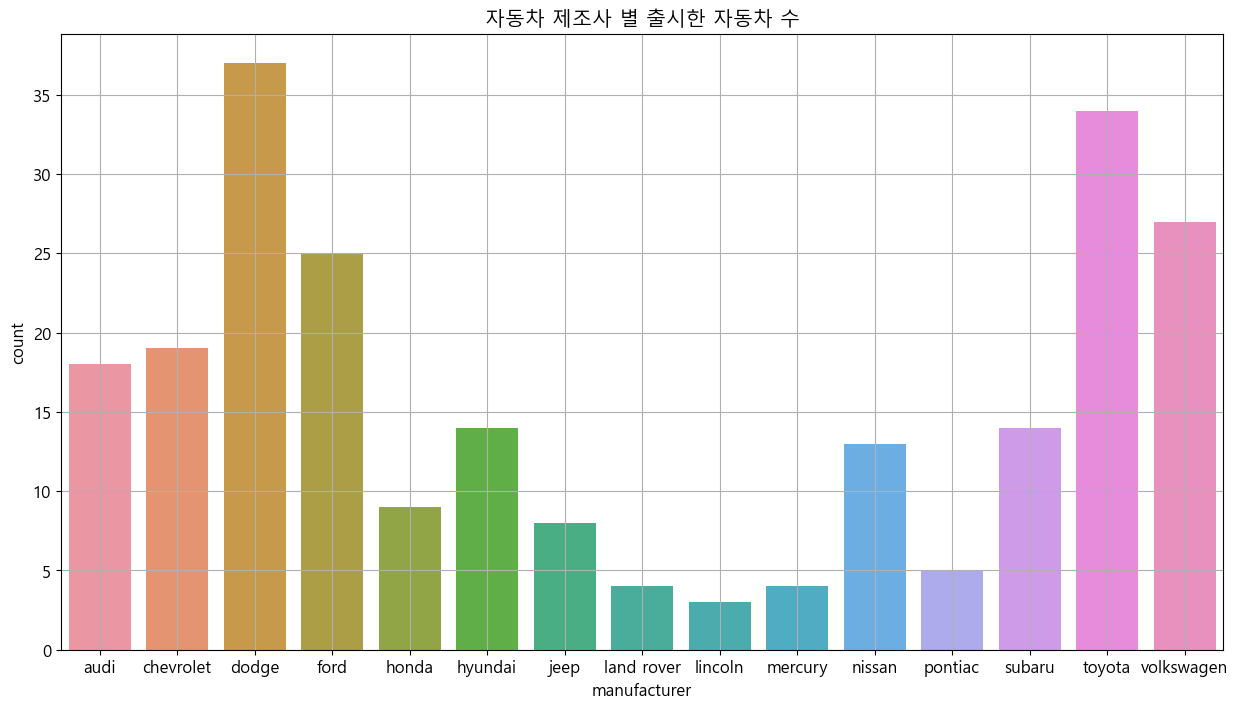

In [9]:
# x 축 = df['manufacturer] 
sb.countplot(data=df, x="manufacturer")
plt.title('자동차 제조사 별 출시한 자동차 수')
plt.grid()
plt.show()
plt.close()

#### - 선생님 풀이(catplot사용)

#### 문제2. 자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

In [11]:
# 데이터 전처리: 
df2 = df.astype({'manufacturer':'category', 'year':'category'})
df2.dtypes

manufacturer    category
model             object
displ            float64
year            category
cyl                int64
trans             object
drv               object
cty                int64
hwy                int64
fl                object
class             object
dtype: object

#### - 내풀이

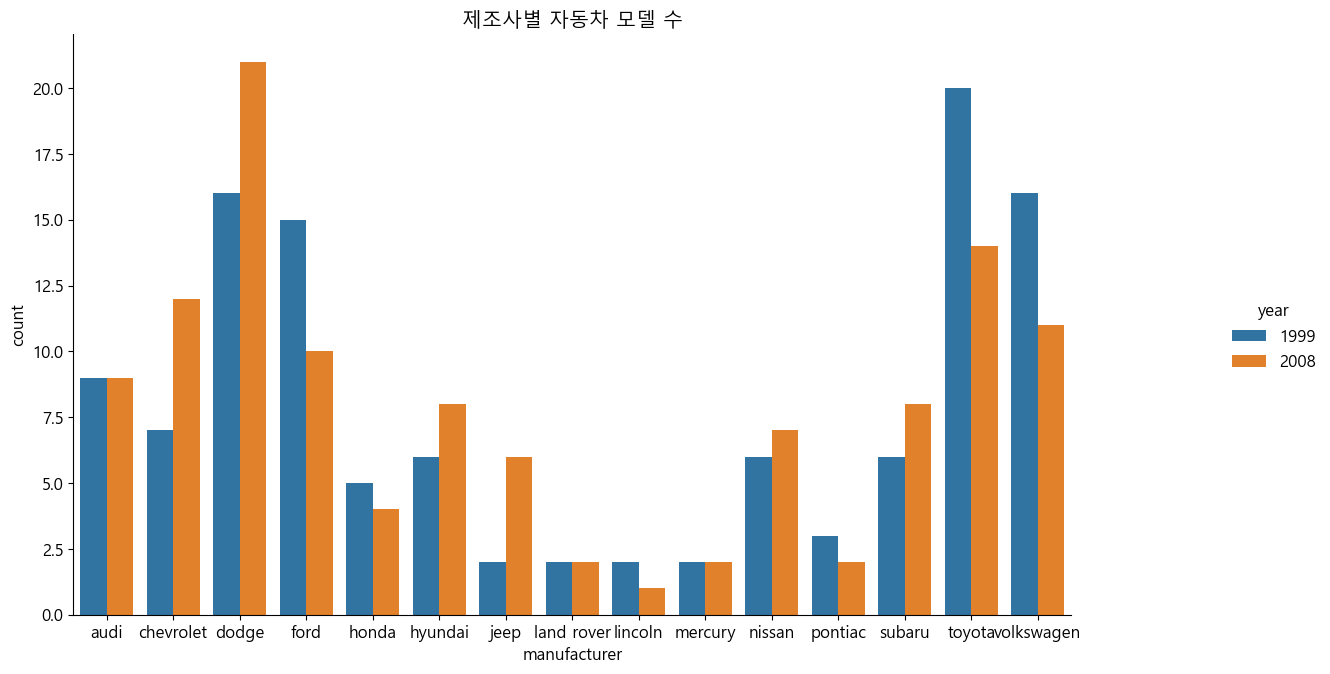

In [12]:
# 자동차 제조사에 따른 자동차 수를 -> 제조년도에 범주화하여 시각화
c = sb.catplot(
              data=df2,              
               x='manufacturer',        
               kind='count',       
               hue='year'
               )

c.fig.set_figwidth(15)
c.fig.set_figheight(7)

plt.title('제조사별 자동차 모델 수')
plt.show()
plt.close()

#### -선생님 풀이(countlot)

#### 문제3. 구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.

In [13]:
# 데이터 전처리
df3 = df2.astype({'drv':'category'})
df3.dtypes

manufacturer    category
model             object
displ            float64
year            category
cyl                int64
trans             object
drv             category
cty                int64
hwy                int64
fl                object
class             object
dtype: object

#### - 내 풀이 (catplot 사용)

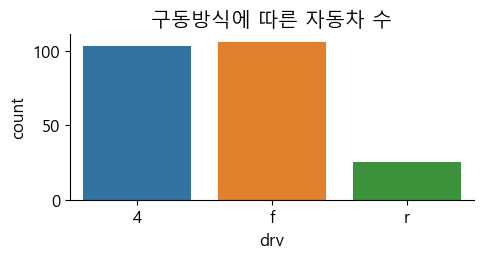

In [15]:
# 구동방식에 따른 자동차 수를 하나의 그래프로 시각화
c = sb.catplot(
              data=df3,              
               x='drv',        
               kind='count',       
               )

c.fig.set_figwidth(5)
c.fig.set_figheight(2)

plt.title('구동방식에 따른 자동차 수')
plt.show()
plt.close()

#### - 선생님 풀이 (countplot 사용)

In [ ]:
c = sb.countplot(
              data=df3,              
               x='drv',           
               )

c.fig.set_figwidth(5)
c.fig.set_figheight(2)

plt.title('구동방식에 따른 자동차 수')
plt.show()
plt.close()

#### 문제4. 자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

In [16]:
# 데이터 전처리
df4 = df3.astype({'cty':'category'})
df4.dtypes

id                 int64
manufacturer    category
model             object
displ            float64
year            category
cyl                int64
trans             object
drv             category
cty             category
hwy                int64
fl                object
class             object
dtype: object

#### -내 풀이(barplot사용)

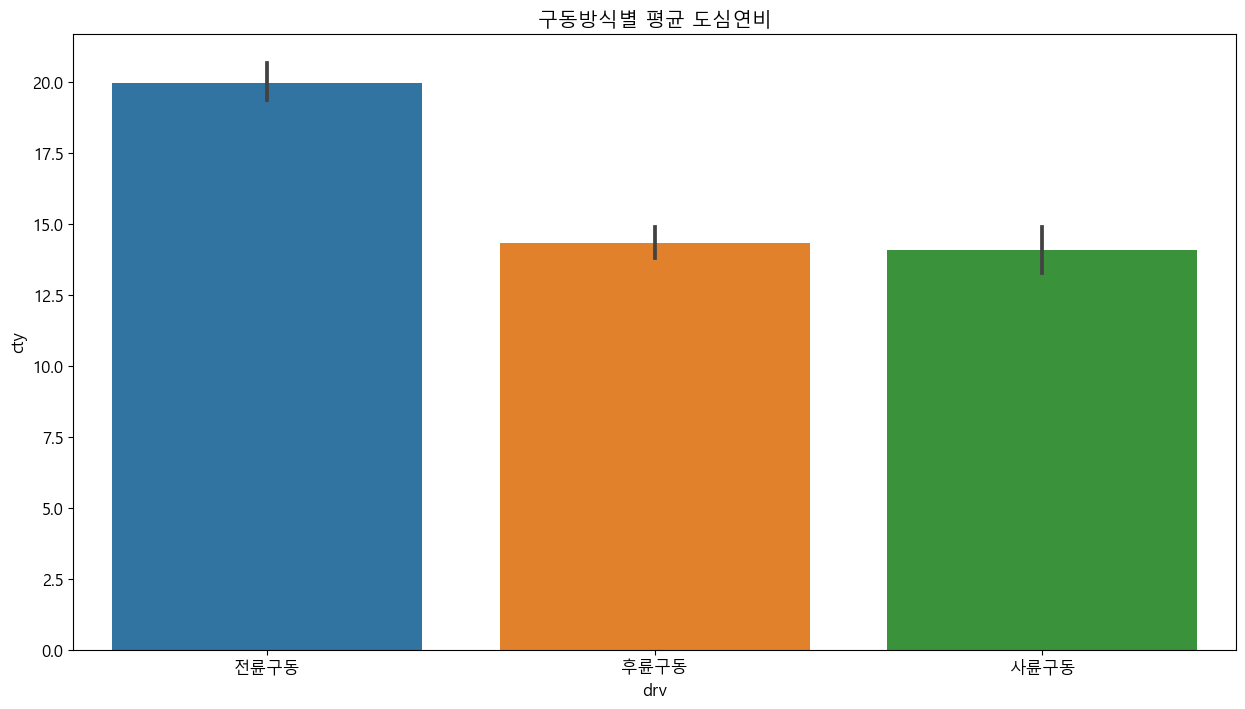

In [18]:
# 자동차 구동방식(drv)에 따른 도심연비(cty)평균(mean)을 하나의 그래프로 시각화
sb.barplot(data=df, x='drv', y='cty')

plt.title('구동방식별 평균 도심연비')
plt.xticks([0,1,2],['전륜구동', '후륜구동', '사륜구동'])
plt.show()
plt.close()

#### 문제5. 자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

In [19]:
# 범주형 데이터타입으로 변환
df5 = df4.astype({'hwy':'category'})
df5.dtypes

id                 int64
manufacturer    category
model             object
displ            float64
year            category
cyl                int64
trans             object
drv             category
cty             category
hwy             category
fl                object
class             object
dtype: object

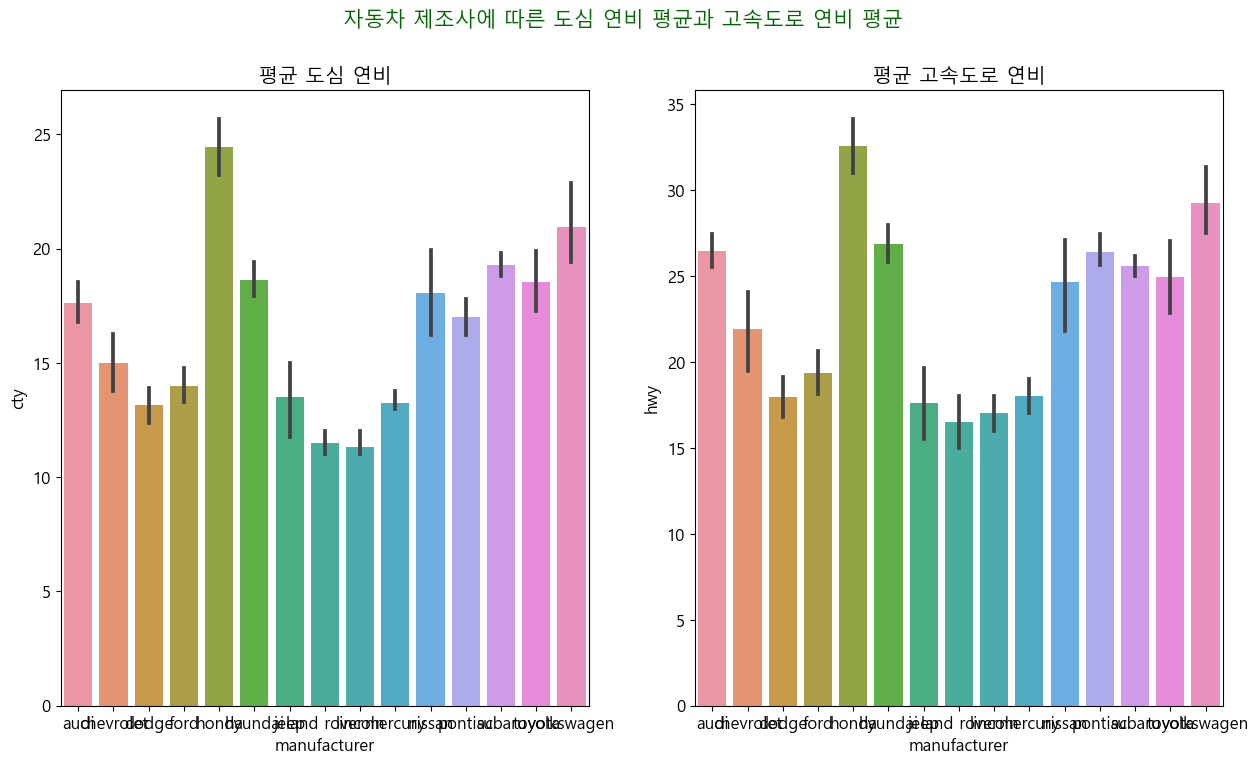

In [24]:
# 서브플롯 생성 -> 1행 2열
fig,(ax1,ax2) = plt.subplots(1,2)

# 전체항목(제목)
fig.suptitle('자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균', fontsize=15, color="#006600")

# 각 그래프 간의 가로(wspace), 세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# 자동차 제조사('manufacturer')에 따른 도심 연비 평균('cty')과 고속도로 연비평균('hwy') -> 서브플롯 형태
sb.barplot(data=df, x='manufacturer', y='cty', estimator='mean', ax=ax1)
sb.barplot(data=df, x='manufacturer', y='hwy', estimator='mean', ax=ax2)

ax1.title.set_text("평균 도심 연비")
ax2.title.set_text("평균 고속도로 연비")

plt.show()
plt.close()

#### 문제6. 배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다. 서브플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.

In [21]:
# 데이터 범주형으로
df6 = df5.astype({'displ':'category'})
df6.dtypes

id                 int64
manufacturer    category
model             object
displ           category
year            category
cyl                int64
trans             object
drv             category
cty             category
hwy             category
fl                object
class             object
dtype: object

#### - 내 풀이

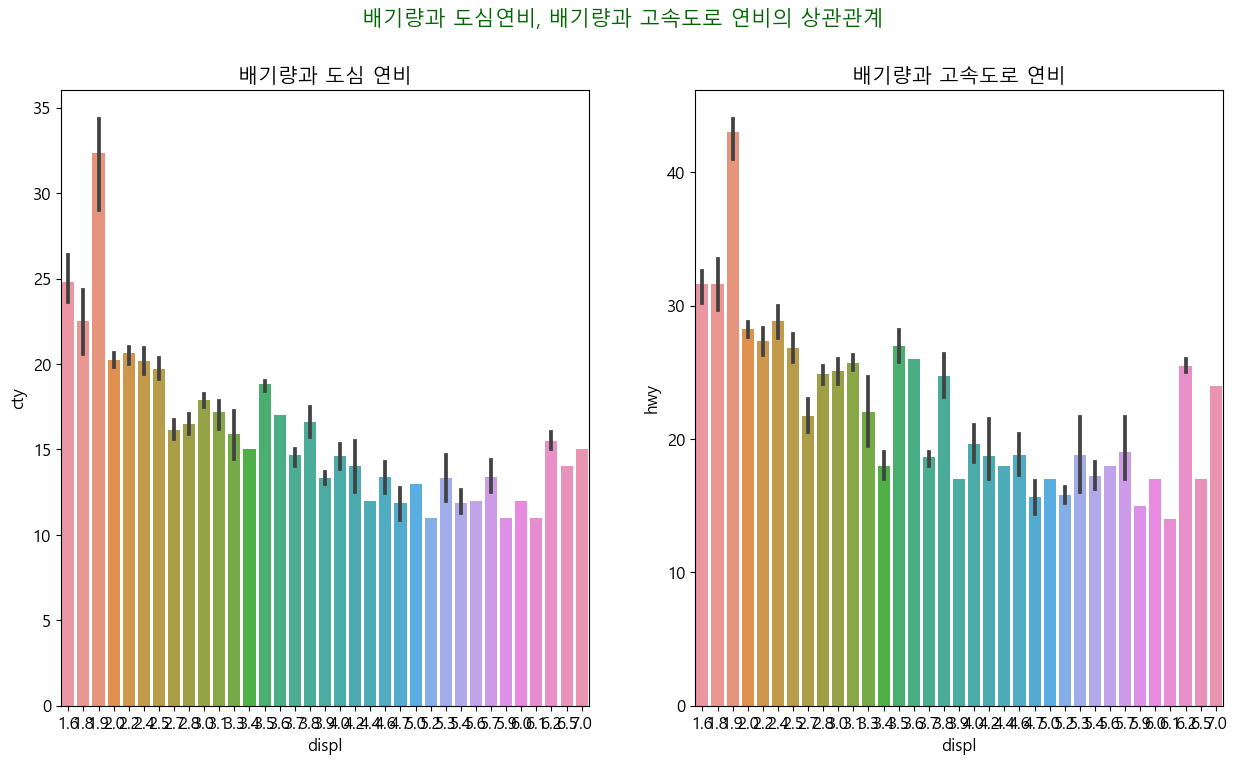

In [25]:
# 서브플롯 생성 -> 1행 2열
fig,(ax1,ax2) = plt.subplots(1,2)

# 전체항목(제목)
fig.suptitle('배기량과 도심연비, 배기량과 고속도로 연비의 상관관계', fontsize=15, color="#006600")

# 각 그래프 간의 가로(wspace), 세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# ax1
sb.barplot(data=df, x='displ', y='cty', ax=ax1)
ax1.title.set_text("배기량과 도심 연비")
# ax2
sb.barplot(data=df, x='displ', y='hwy', ax=ax2)
ax2.title.set_text("배기량과 고속도로 연비")

plt.show()
plt.close()

#### -선생님 풀이

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

fig.subplots_adjust(wspace=0.1)

fig.suptitle('배기량과 연비의 상관관계', fontsize=25)

sb.regplot(data=df, x='displ', y='cty', ax=ax1)
sb.regplot(data=df, x='displ', y='hwy', ax=ax2)

ax1.title.set_text("배기량과 도심 연비")
ax2.title.set_text("배기량과 고속도로 연비")

plt.show()
plt.close()

#### 문제7.

In [6]:
df.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [7]:
# 평균 연비 칼럼 추가
df7 = df.copy()
df7['평균연비'] = df.loc[:,'cty':'hwy'].mean(axis=1)
df7

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비
id,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0


In [8]:
# 전체 평균 연비에 대한 평균값을 구하기
total_value = df7['평균연비'].mean()
total_value

20.14957264957265

In [9]:
# ['평가'] 평균값보다 평균연비가 높을 경우 'pass' 그렇지 않을경우 'fail'로 표시
df7['평가'] = np.where(df7['평균연비'] >= total_value, 'pass', 'fail')
df7

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비,평가
id,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,pass
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,pass
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,pass


In [10]:
# 평균연비에 대한 백분율을 구하기
df7['percentage'] = (df7['평균연비']/total_value) * 100
df7

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비,평가,percentage
id,,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,116.627784
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,124.072110
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,126.553552
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,126.553552
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,104.220573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,pass,116.627784
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,pass,124.072110
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,pass,104.220573


In [11]:
# ['등급'] 평균연비의 백분율이 90점이상일 경우 A, 80점 이상일 경우 B, 70점이상일 경우 C, 그 외의경우 D
conditions = [
    (df7['percentage']>=90),
    (df7['percentage']>=80),
    (df7['percentage']>=70)
]

value = ['A','B','C']

df7['등급'] = np.select(conditions, value, default='D')
df7

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균연비,평가,percentage,등급
id,,,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,116.627784,A
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,124.072110,A
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,126.553552,A
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,126.553552,A
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,104.220573,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,pass,116.627784,A
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,pass,124.072110,A
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,pass,104.220573,A


### 서브플롯

In [12]:
# 그래프 전역 설정
'''
python
변수 = 참인 경우_할당될_값 if 조건식 else 거짓인경우_할당될_값
'''
font_name = "Malgun Gothic" if sys.platform == 'win32' else "Apple Gothic"
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['axes.unicode_minus'] = False

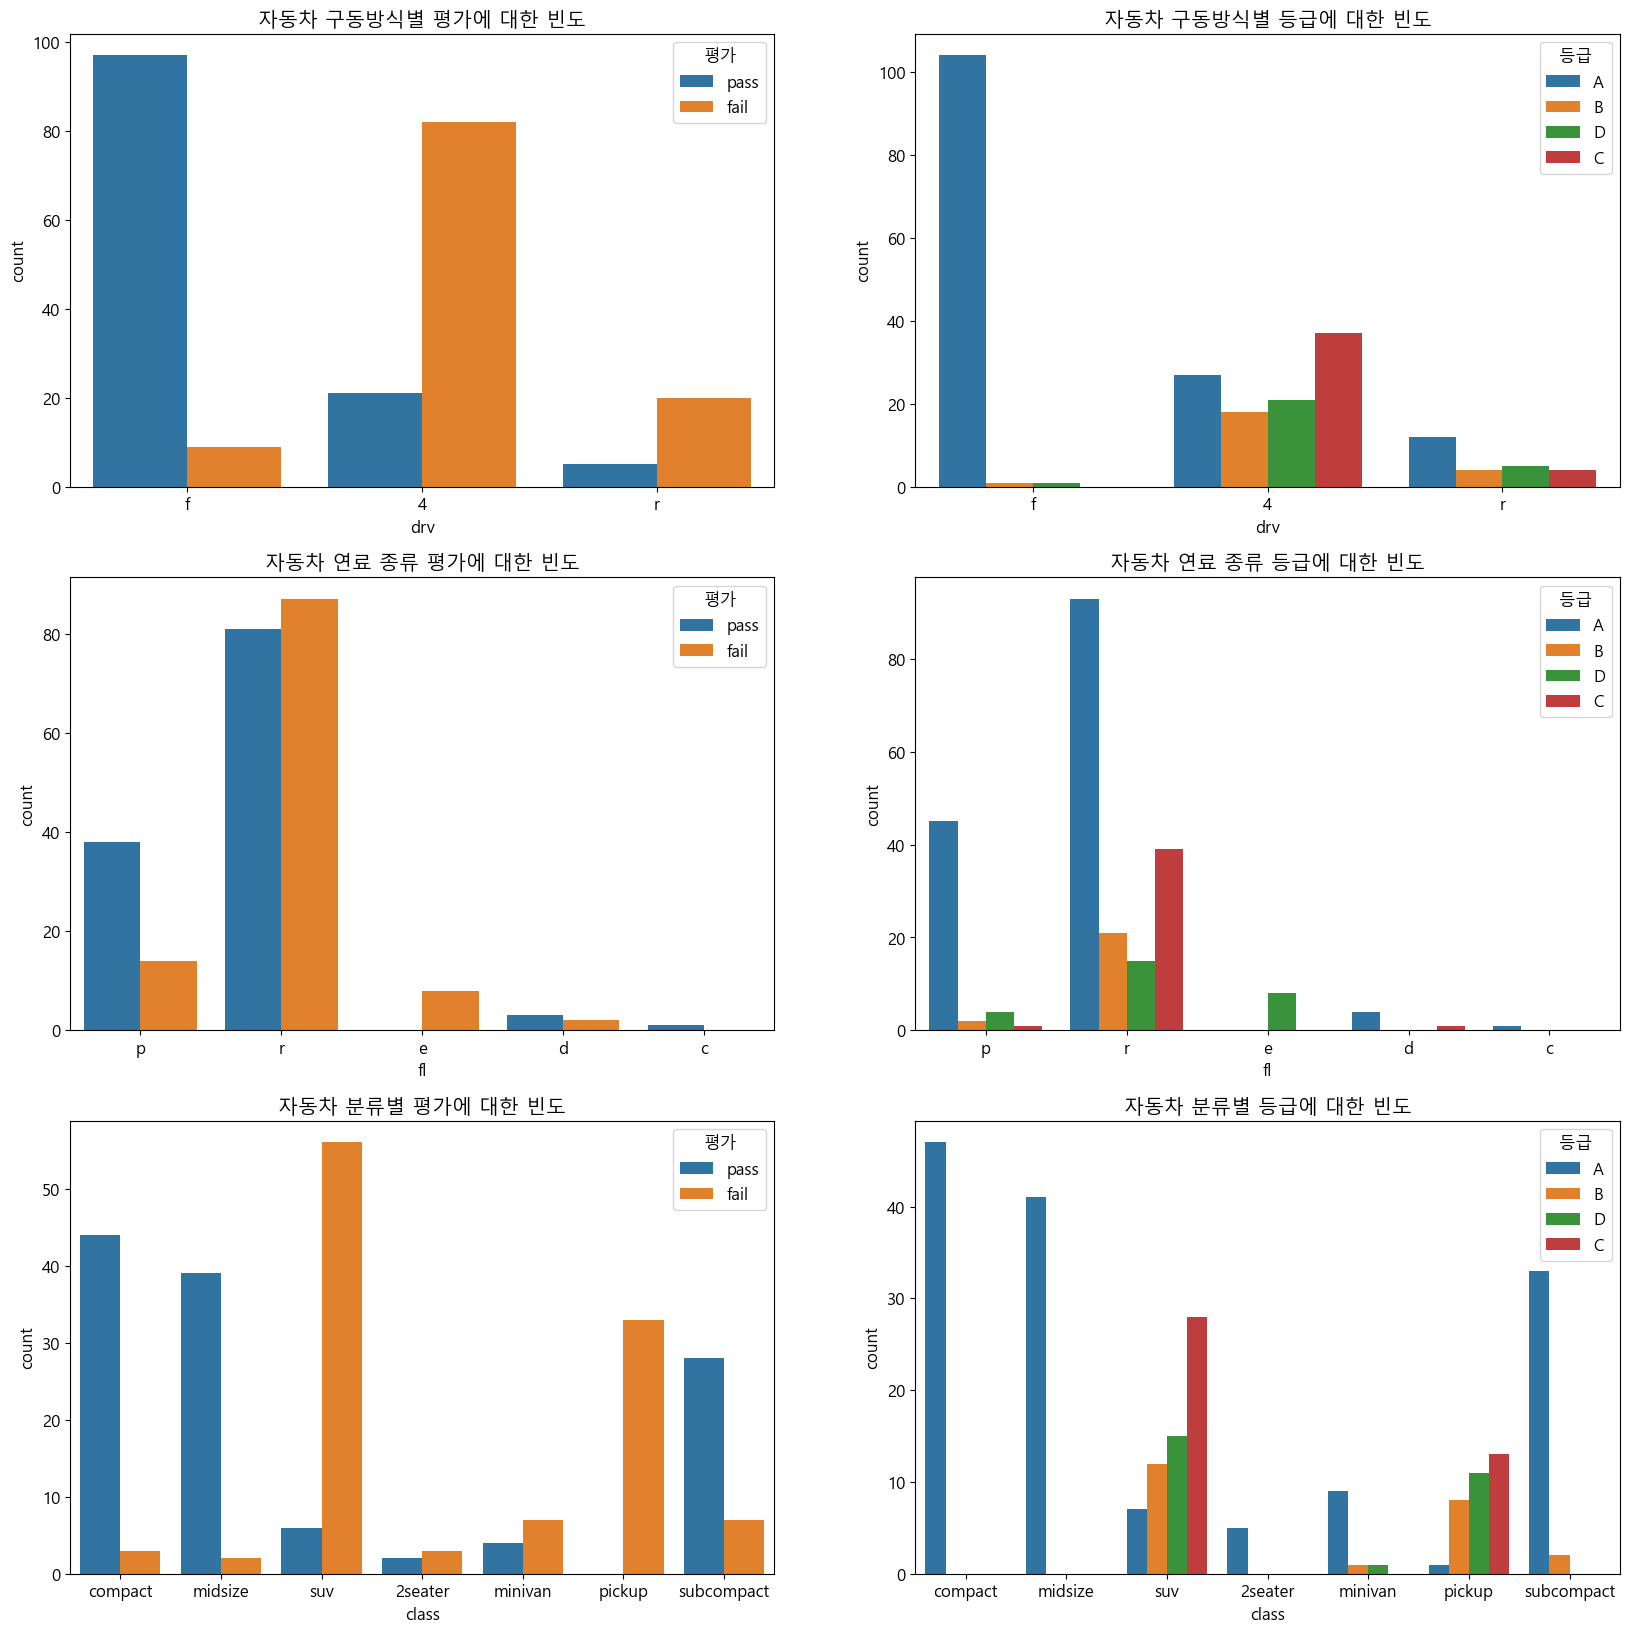

In [18]:
# 서브플롯 영역 설정
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
fig.subplots_adjust(wspace=0.2)

#-------------------------------------
# 자동차 구동방식별 [평가]에 대한 빈도
sb.countplot(data=df7, x='drv',hue='평가',ax=ax[0][0])
ax[0][0].title.set_text('자동차 구동방식별 평가에 대한 빈도')

# 자동차 구동방식별 [등급]에 대한 빈도
sb.countplot(data=df7, x='drv',hue='등급',ax=ax[0][1])
ax[0][1].title.set_text('자동차 구동방식별 등급에 대한 빈도')

# 자동차 연료 종류 [평가]에 대한 빈도
sb.countplot(data=df7, x='fl',hue='평가',ax=ax[1][0])
ax[1][0].title.set_text('자동차 연료 종류 평가에 대한 빈도')

# 자동차 연료 종류 [등급]에 대한 빈도
sb.countplot(data=df7, x='fl',hue='등급', ax=ax[1][1])
ax[1][1].title.set_text('자동차 연료 종류 등급에 대한 빈도')

# 자동차 분류별 [평가]에 대한 빈도
sb.countplot(data=df7, x='class', hue='평가', ax=ax[2][0])
ax[2][0].title.set_text('자동차 분류별 평가에 대한 빈도')

# 자동차 분류별 [등급]에 대한 빈도
sb.countplot(data=df7,x='class',hue='등급', ax=ax[2][1])
ax[2][1].title.set_text('자동차 분류별 등급에 대한 빈도')

plt.show()
plt.close()